In [93]:
import numpy as np
from scipy.fft import fft, rfft, fftfreq, fftshift
from scipy.signal import correlate, convolve, welch, periodogram
from scipy.signal.windows import hamming, hann
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('./nikhils_plot_style.mplstyle')

# Simulated data

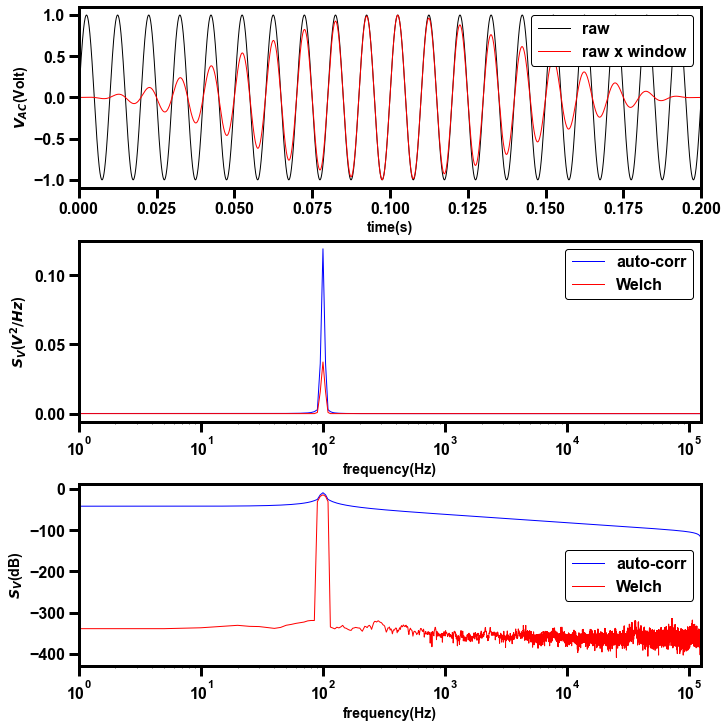

In [96]:
sampling_rate = 0.25e6 # Hz
sampling_time = 0.2 # seconds
N = int(sampling_rate*sampling_time) # number of samples
time = np.arange(0,sampling_time,1/sampling_rate)

V = np.sin(2*np.pi*100*time) # sine signal with frequency 100Hz

V = V - np.mean(V)

Vraw = V
V = V*hann(N+1) # smoothing using a hamming window

# auto_corr = correlate(V,V, mode="same") # mode="same" returns the same length as the input i.e. lags start from 0 to (N-1)*dt
# auto_corr = convolve(V, np.conjugate(np.flip(V)), mode="same")
S = fft(auto_corr)
S = S[:S.size//2]
S = 2*S/N**2
freq = fftfreq(len(auto_corr), d=1/sampling_rate)
freq = freq[:freq.size//2]

fq, SS = welch(V, fs=sampling_rate, window='hamming', nperseg=N, noverlap=0, return_onesided=True, scaling='density', axis=-1)

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize = (10,10), constrained_layout=True)
ax1.plot(time, Vraw, label="raw")
ax1.plot(time, V, label="raw x window")
ax1.set_xlim(time.min(),time.max())
ax1.set_xlabel('time(s)')
ax1.set_ylabel('$V_{AC}$(Volt)')

ax2.plot(freq, np.absolute(S), 'b-', markersize=3, label="auto-corr")
ax2.plot(fq, np.absolute(SS), 'r-', markersize=3, label="Welch")
ax2.set_xlabel('frequency(Hz)')
ax2.set_ylabel('$S_V$($V^2/Hz$)')
ax2.set_xlim(1, freq.max())
ax2.set_xscale('log')
# ax2.set_yscale('log')


ax3.plot(freq, 10*np.log10(np.absolute(S)), 'b-', markersize=3, label="auto-corr")
ax3.plot(fq,10*np.log10(SS),'r-', label="Welch")
ax3.set_xlabel('frequency(Hz)')
ax3.set_ylabel('$S_V$(dB)')
ax3.set_xlim(1, freq.max())
ax3.set_xscale('log')

ax1.legend()
ax2.legend()
ax3.legend()
plt.show()

# Trying with actual data from scope

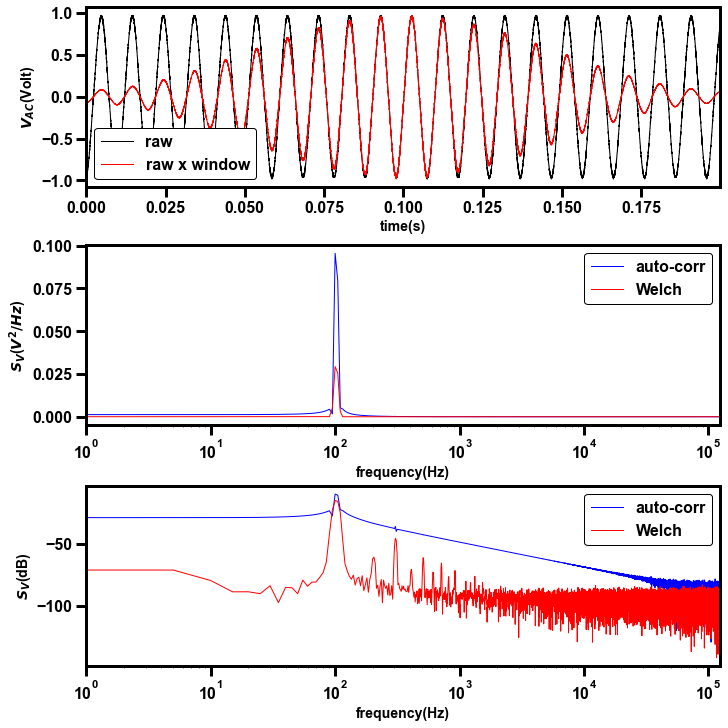

In [51]:
fp="./data/scope_1.csv"
df=pd.read_csv(fp,header=0,sep=",",skiprows=1, names=["time", "voltage"])
df.head()

sampling_time = df["time"].max()-df["time"].min() # seconds
N = df.shape[0]
sampling_rate = N/sampling_time # Hz
time = df["time"].to_numpy() - df["time"].min()

V = df["voltage"].to_numpy() # sine signal with frequency 500Hz

V = V - np.mean(V)

Vraw = V
V = V*hamming(N) # smoothing using a hamming window

auto_corr = correlate(V,V, mode="same") # mode="same" returns the same length as the input i.e. lags start from 0 to (N-1)*dt
S = fft(auto_corr)
S = S[:S.size//2]
S = 2*S/N**2
freq = fftfreq(len(auto_corr), d=1/sampling_rate)
freq = freq[:freq.size//2]

fq, SS = welch(V, fs=sampling_rate, window='hamming', nperseg=N, noverlap=0, return_onesided=True, scaling='density', axis=-1)

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize = (10,10), constrained_layout=True)
ax1.plot(time, Vraw, label="raw")
ax1.plot(time, V, label="raw x window")
ax1.set_xlim(time.min(),time.max())
ax1.set_xlabel('time(s)')
ax1.set_ylabel('$V_{AC}$(Volt)')

ax2.plot(freq, np.absolute(S), 'b-', markersize=3, label="auto-corr")
ax2.plot(fq, np.absolute(SS), 'r-', markersize=3, label="Welch")
ax2.set_xlabel('frequency(Hz)')
ax2.set_ylabel('$S_V$($V^2/Hz$)')
ax2.set_xlim(1, freq.max())
ax2.set_xscale('log')
# ax2.set_yscale('log')


ax3.plot(freq, 10*np.log10(np.absolute(S)), 'b-', markersize=3, label="auto-corr")
ax3.plot(fq,10*np.log10(SS),'r-', label="Welch")
ax3.set_xlabel('frequency(Hz)')
ax3.set_ylabel('$S_V$(dB)')
ax3.set_xlim(1, freq.max())
ax3.set_xscale('log')

ax1.legend()
ax2.legend()
ax3.legend()
plt.show()

# 10 kOhm resistor data

1.5 Volt battery with 10 M Ohm resistor in series gives 1.5 uA of current.

This current flows through a 10 kOhm resistor to give a voltage drop of V = 1.5 uA x 10 kOhm = 1.5 mV

The thermal noise should be equal to $S_V(f)$ = 4kTR = 104 meV x 10 kOhm = 1.664e-16 V^2/Hz


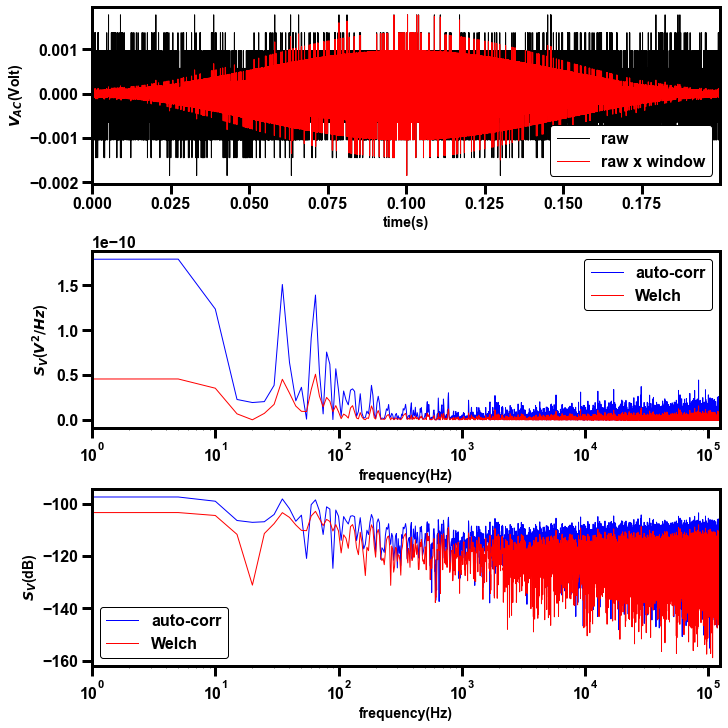

In [52]:
fp="./data/scope_2.csv"
df=pd.read_csv(fp,header=0,sep=",",skiprows=1, names=["time", "voltage"])
df.head()

sampling_time = df["time"].max()-df["time"].min() # seconds
N = df.shape[0]
sampling_rate = N/sampling_time # Hz
time = df["time"].to_numpy() - df["time"].min()

V = df["voltage"].to_numpy() # sine signal with frequency 500Hz

V = V - np.mean(V)

Vraw = V
V = V*hamming(N) # smoothing using a hamming window

auto_corr = correlate(V,V, mode="same") # mode="same" returns the same length as the input i.e. lags start from 0 to (N-1)*dt
S = fft(auto_corr)
S = S[:S.size//2]
S = 2*S/N**2
freq = fftfreq(len(auto_corr), d=1/sampling_rate)
freq = freq[:freq.size//2]

fq, SS = welch(V, fs=sampling_rate, window='hamming', nperseg=N, noverlap=0, return_onesided=True, scaling='density', axis=-1)

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize = (10,10), constrained_layout=True)
ax1.plot(time, Vraw, label="raw")
ax1.plot(time, V, label="raw x window")
ax1.set_xlim(time.min(),time.max())
ax1.set_xlabel('time(s)')
ax1.set_ylabel('$V_{AC}$(Volt)')

ax2.plot(freq, np.absolute(S), 'b-', markersize=3, label="auto-corr")
ax2.plot(fq, np.absolute(SS), 'r-', markersize=3, label="Welch")
ax2.set_xlabel('frequency(Hz)')
ax2.set_ylabel('$S_V$($V^2/Hz$)')
ax2.set_xlim(1, freq.max())
ax2.set_xscale('log')
# ax2.set_yscale('log')


ax3.plot(freq, 10*np.log10(np.absolute(S)), 'b-', markersize=3, label="auto-corr")
ax3.plot(fq,10*np.log10(SS),'r-', label="Welch")
ax3.set_xlabel('frequency(Hz)')
ax3.set_ylabel('$S_V$(dB)')
ax3.set_xlim(1, freq.max())
ax3.set_xscale('log')

ax1.legend()
ax2.legend()
ax3.legend()
plt.show()

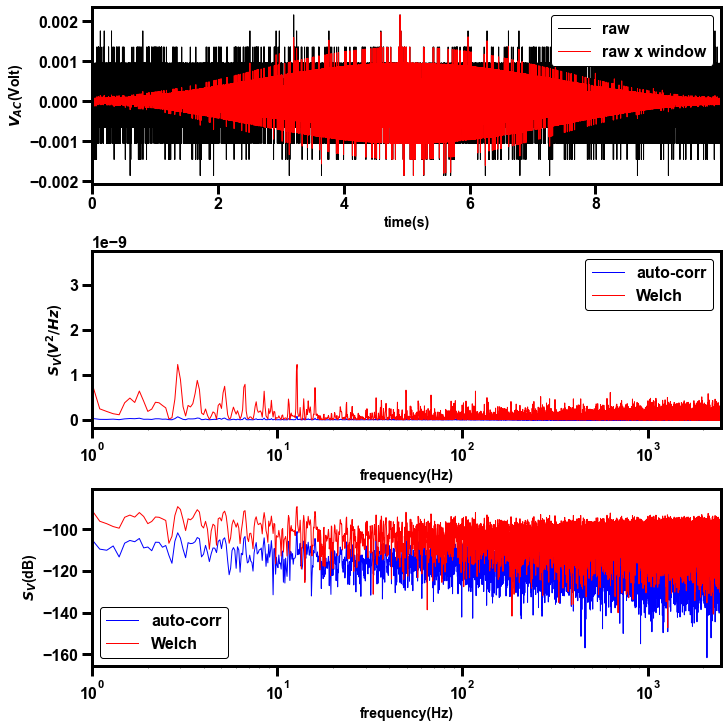

In [53]:
fp="./data/scope_4.csv"
df=pd.read_csv(fp,header=0,sep=",",skiprows=1, names=["time", "voltage"])
df.head()

sampling_time = df["time"].max()-df["time"].min() # seconds
N = df.shape[0]
sampling_rate = N/sampling_time # Hz
time = df["time"].to_numpy() - df["time"].min()

V = df["voltage"].to_numpy() # sine signal with frequency 500Hz

V = V - np.mean(V)

Vraw = V
V = V*hamming(N) # smoothing using a hamming window

auto_corr = correlate(V,V, mode="same") # mode="same" returns the same length as the input i.e. lags start from 0 to (N-1)*dt
S = fft(auto_corr)
S = S[:S.size//2]
S = 2*S/N**2
freq = fftfreq(len(auto_corr), d=1/sampling_rate)
freq = freq[:freq.size//2]

fq, SS = welch(V, fs=sampling_rate, window='hamming', nperseg=N, noverlap=0, return_onesided=True, scaling='density', axis=-1)

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize = (10,10), constrained_layout=True)
ax1.plot(time, Vraw, label="raw")
ax1.plot(time, V, label="raw x window")
ax1.set_xlim(time.min(),time.max())
ax1.set_xlabel('time(s)')
ax1.set_ylabel('$V_{AC}$(Volt)')

ax2.plot(freq, np.absolute(S), 'b-', markersize=3, label="auto-corr")
ax2.plot(fq, np.absolute(SS), 'r-', markersize=3, label="Welch")
ax2.set_xlabel('frequency(Hz)')
ax2.set_ylabel('$S_V$($V^2/Hz$)')
ax2.set_xlim(1, freq.max())
ax2.set_xscale('log')
# ax2.set_yscale('log')


ax3.plot(freq, 10*np.log10(np.absolute(S)), 'b-', markersize=3, label="auto-corr")
ax3.plot(fq,10*np.log10(SS),'r-', label="Welch")
ax3.set_xlabel('frequency(Hz)')
ax3.set_ylabel('$S_V$(dB)')
ax3.set_xlim(1, freq.max())
ax3.set_xscale('log')

ax1.legend()
ax2.legend()
ax3.legend()
plt.show()

## 10 k Ohm background

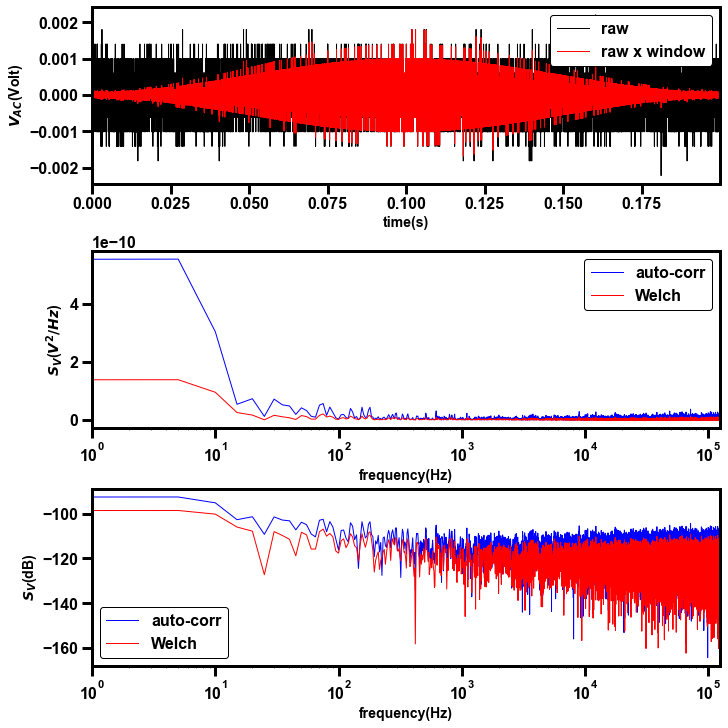

In [75]:
fp="./data/scope_3.csv"
df=pd.read_csv(fp,header=0,sep=",",skiprows=1, names=["time", "voltage"])
df.head()

sampling_time = df["time"].max()-df["time"].min() # seconds
N = df.shape[0]
sampling_rate = N/sampling_time # Hz
time = df["time"].to_numpy() - df["time"].min()

V = df["voltage"].to_numpy() # sine signal with frequency 500Hz

V = V - np.mean(V)

Vraw = V
V = V*hamming(N) # smoothing using a hamming window

auto_corr = correlate(V,V, mode="same", method='direct') # mode="same" returns the same length as the input i.e. lags start from 0 to (N-1)*dt
S = fft(auto_corr)
S = S[:S.size//2]
S = 2*S/N**2
# S = S*(1/N)*(1/sampling_rate)**2
freq = fftfreq(len(auto_corr), d=1/sampling_rate)
freq = freq[:freq.size//2]

fq, SS = welch(V, fs=sampling_rate, window='hamming', nperseg=N, noverlap=0, return_onesided=True, scaling='density', axis=-1)

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize = (10,10), constrained_layout=True)
ax1.plot(time, Vraw, label="raw")
ax1.plot(time, V, label="raw x window")
ax1.set_xlim(time.min(),time.max())
ax1.set_xlabel('time(s)')
ax1.set_ylabel('$V_{AC}$(Volt)')

ax2.plot(freq, np.absolute(S), 'b-', markersize=3, label="auto-corr")
ax2.plot(fq, np.absolute(SS), 'r-', markersize=3, label="Welch")
ax2.set_xlabel('frequency(Hz)')
ax2.set_ylabel('$S_V$($V^2/Hz$)')
ax2.set_xlim(1, freq.max())
ax2.set_xscale('log')
# ax2.set_yscale('log')


ax3.plot(freq, 10*np.log10(np.absolute(S)), 'b-', markersize=3, label="auto-corr")
ax3.plot(fq,10*np.log10(SS),'r-', label="Welch")
ax3.set_xlabel('frequency(Hz)')
ax3.set_ylabel('$S_V$(dB)')
ax3.set_xlim(1, freq.max())
ax3.set_xscale('log')

ax1.legend()
ax2.legend()
ax3.legend()
plt.show()


## 60 Hz pickup from a wire connected to the input of scope

File contains (100000, 2) points.


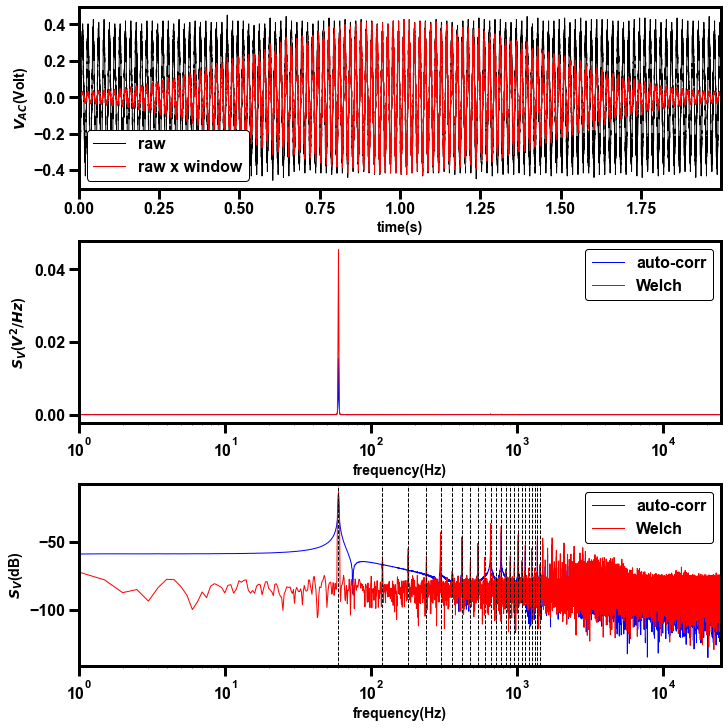

In [76]:
fp="./data/scope_7_1.csv"
df=pd.read_csv(fp,header=0,sep=",",skiprows=1, names=["time", "voltage"])
print(f"File contains {df.shape} points.")

sampling_time = df["time"].max()-df["time"].min() # seconds
N = df.shape[0]
sampling_rate = N/sampling_time # Hz
time = df["time"].to_numpy() - df["time"].min()

V = df["voltage"].to_numpy() # sine signal with frequency 500Hz

V = V - np.mean(V)

Vraw = V
V = V*hamming(N) # smoothing using a hamming window

auto_corr = correlate(V,V, mode="same", method='direct') # mode="same" returns the same length as the input i.e. lags start from 0 to (N-1)*dt
S = fft(auto_corr)
S = S[:S.size//2]
S = 2*S/N**2
# S = S*(1/N)*(1/sampling_rate)**2
freq = fftfreq(len(auto_corr), d=1/sampling_rate)
freq = freq[:freq.size//2]

fq, SS = welch(V, fs=sampling_rate, window='hamming', nperseg=N, noverlap=0, return_onesided=True, scaling='density', axis=-1)

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize = (10,10), constrained_layout=True)
ax1.plot(time, Vraw, label="raw")
ax1.plot(time, V, label="raw x window")
ax1.set_xlim(time.min(),time.max())
ax1.set_xlabel('time(s)')
ax1.set_ylabel('$V_{AC}$(Volt)')

ax2.plot(freq, np.absolute(S), 'b-', markersize=3, label="auto-corr")
ax2.plot(fq, np.absolute(SS), 'r-', markersize=3, label="Welch")
ax2.set_xlabel('frequency(Hz)')
ax2.set_ylabel('$S_V$($V^2/Hz$)')
ax2.set_xlim(1, freq.max())
ax2.set_xscale('log')
# ax2.set_yscale('log')


ax3.plot(freq, 10*np.log10(np.absolute(S)), 'b-', markersize=3, label="auto-corr")
ax3.plot(fq,10*np.log10(SS),'r-', label="Welch")
for n in range(1,25):
    ax3.axvline(60*n, color='k', linestyle='--')
ax3.set_xlabel('frequency(Hz)')
ax3.set_ylabel('$S_V$(dB)')
ax3.set_xlim(1, freq.max())
ax3.set_xscale('log')

ax1.legend()
ax2.legend()
ax3.legend()
plt.show()


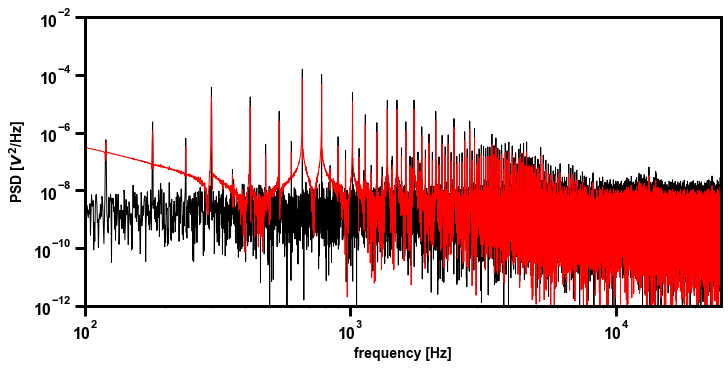

In [79]:
f, Pxx_den = periodogram(V, fs=sampling_rate)

fig, ax = plt.subplots(1,1, figsize = (10,5), constrained_layout=True)
ax.plot(f, Pxx_den)
ax.plot(freq, np.absolute(S), 'r-', markersize=3, label="auto-corr")
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [$V^2$/Hz]')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-12,1e-2)
ax.set_xlim(1e2, freq.max())
plt.show()